In [1]:
import control
import numpy as np
import matplotlib.pyplot as plt

import kontrol


rel_sc_low_low = kontrol.load_transfer_function("noise_models/rel_sc_low_low.pkl")
rel_sc_low_mid = kontrol.load_transfer_function("noise_models/rel_sc_low_mid.pkl")
rel_sc_low_high = kontrol.load_transfer_function("noise_models/rel_sc_low_high.pkl")

rel_sc_mid_low = kontrol.load_transfer_function("noise_models/rel_sc_mid_low.pkl")
rel_sc_mid_mid = kontrol.load_transfer_function("noise_models/rel_sc_mid_mid.pkl")
rel_sc_mid_high = kontrol.load_transfer_function("noise_models/rel_sc_mid_high.pkl")

rel_sc_high_low = kontrol.load_transfer_function("noise_models/rel_sc_high_low.pkl")
rel_sc_high_mid = kontrol.load_transfer_function("noise_models/rel_sc_high_mid.pkl")
rel_sc_high_high = kontrol.load_transfer_function("noise_models/rel_sc_high_high.pkl")

gs13_low = kontrol.load_transfer_function("noise_models/gs13_low.pkl")
gs13_mid = kontrol.load_transfer_function("noise_models/gs13_mid.pkl")
gs13_high = kontrol.load_transfer_function("noise_models/gs13_high.pkl")

f = np.logspace(-3, 3, 1024)

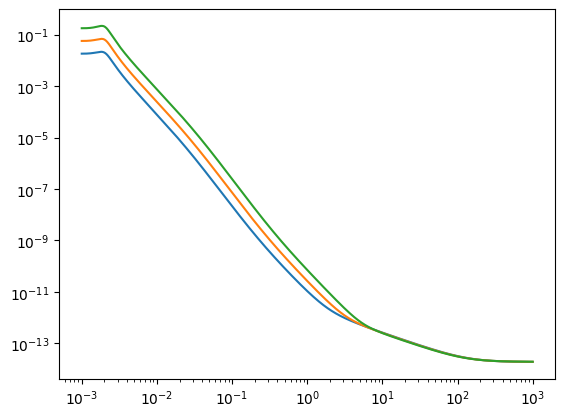

In [2]:
plt.loglog(f, abs(gs13_low(1j*2*np.pi*f)))
plt.loglog(f, abs(gs13_mid(1j*2*np.pi*f)))
plt.loglog(f, abs(gs13_high(1j*2*np.pi*f)))

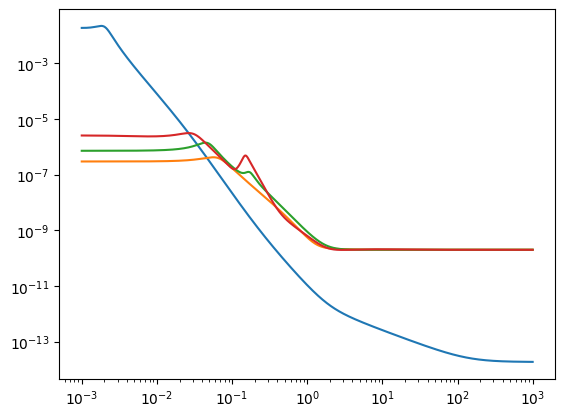

In [3]:
plt.loglog(f, abs(gs13_low(1j*2*np.pi*f)))
plt.loglog(f, abs(rel_sc_low_low(1j*2*np.pi*f)))
plt.loglog(f, abs(rel_sc_mid_low(1j*2*np.pi*f)))
plt.loglog(f, abs(rel_sc_high_low(1j*2*np.pi*f)))

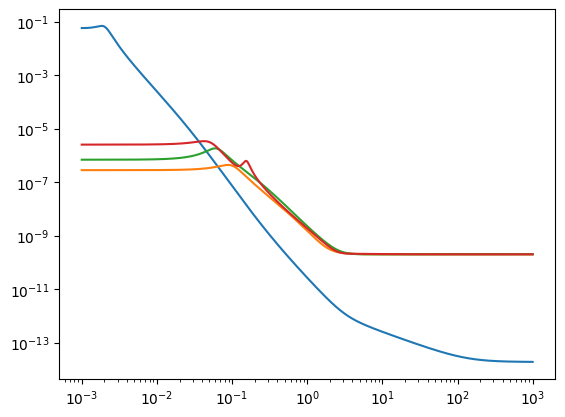

In [4]:
plt.loglog(f, abs(gs13_mid(1j*2*np.pi*f)))
plt.loglog(f, abs(rel_sc_low_mid(1j*2*np.pi*f)))
plt.loglog(f, abs(rel_sc_mid_mid(1j*2*np.pi*f)))
plt.loglog(f, abs(rel_sc_high_mid(1j*2*np.pi*f)))

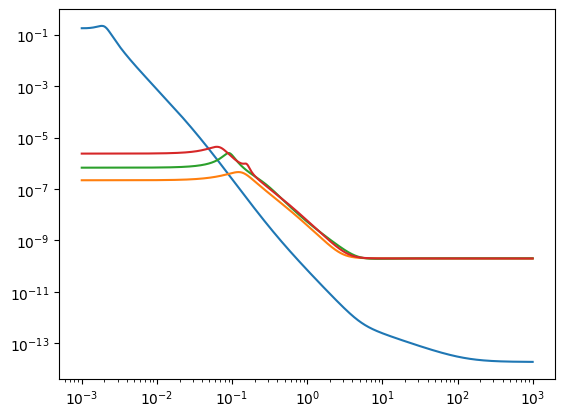

In [5]:
plt.loglog(f, abs(gs13_high(1j*2*np.pi*f)))
plt.loglog(f, abs(rel_sc_low_high(1j*2*np.pi*f)))
plt.loglog(f, abs(rel_sc_mid_high(1j*2*np.pi*f)))
plt.loglog(f, abs(rel_sc_high_high(1j*2*np.pi*f)))

In [6]:
comp_low_low = kontrol.ComplementaryFilter()
comp_low_low.noise1 = rel_sc_low_low
comp_low_low.noise2 = gs13_low
comp_low_low.weight1 = 1/gs13_low
comp_low_low.weight2 = 1/rel_sc_low_low
comp_low_low.h2synthesis()
h1_low_low, h2_low_low = comp_low_low.hinfsynthesis()

In [7]:
comp_low_mid = kontrol.ComplementaryFilter()
comp_low_mid.noise1 = rel_sc_low_mid
comp_low_mid.noise2 = gs13_mid
comp_low_mid.weight1 = 1/gs13_mid
comp_low_mid.weight2 = 1/rel_sc_low_mid
comp_low_mid.h2synthesis()
h1_low_mid, h2_low_mid = comp_low_mid.hinfsynthesis()

In [8]:
comp_low_high = kontrol.ComplementaryFilter()
comp_low_high.noise1 = rel_sc_low_high
comp_low_high.noise2 = gs13_high
comp_low_high.weight1 = 1/gs13_high
comp_low_high.weight2 = 1/rel_sc_low_high
# comp_low_high.h2synthesis()
h1_low_high, h2_low_high = comp_low_high.hinfsynthesis()

In [9]:
comp_mid_low = kontrol.ComplementaryFilter()
comp_mid_low.noise1 = rel_sc_mid_low
comp_mid_low.noise2 = gs13_low
comp_mid_low.weight1 = 1/gs13_low
comp_mid_low.weight2 = 1/rel_sc_mid_low
comp_mid_low.h2synthesis()
h1_mid_low, h2_mid_low = comp_mid_low.hinfsynthesis()

In [10]:
comp_mid_mid = kontrol.ComplementaryFilter()
comp_mid_mid.noise1 = rel_sc_mid_mid
comp_mid_mid.noise2 = gs13_mid
comp_mid_mid.weight1 = 1/gs13_mid
comp_mid_mid.weight2 = 1/rel_sc_mid_mid
comp_mid_mid.h2synthesis()
h1_mid_mid, h2_mid_mid = comp_mid_mid.hinfsynthesis()

In [11]:
comp_mid_high = kontrol.ComplementaryFilter()
comp_mid_high.noise1 = rel_sc_mid_high
comp_mid_high.noise2 = gs13_high
comp_mid_high.weight1 = 1/gs13_high
comp_mid_high.weight2 = 1/rel_sc_mid_high
comp_mid_high.h2synthesis()
h1_mid_high, h2_mid_high = comp_mid_high.hinfsynthesis()

In [12]:
comp_high_low = kontrol.ComplementaryFilter()
comp_high_low.noise1 = rel_sc_high_low
comp_high_low.noise2 = gs13_low
comp_high_low.weight1 = 1/gs13_low
comp_high_low.weight2 = 1/rel_sc_high_low
comp_high_low.h2synthesis()
h1_high_low, h2_high_low = comp_high_low.hinfsynthesis()

In [13]:
comp_high_mid = kontrol.ComplementaryFilter()
comp_high_mid.noise1 = rel_sc_high_mid
comp_high_mid.noise2 = gs13_mid
comp_high_mid.weight1 = 1/gs13_mid
comp_high_mid.weight2 = 1/rel_sc_high_mid
comp_high_mid.h2synthesis()
h1_high_mid, h2_high_mid = comp_high_mid.hinfsynthesis()

In [14]:
comp_high_high = kontrol.ComplementaryFilter()
comp_high_high.noise1 = rel_sc_high_high
comp_high_high.noise2 = gs13_high
comp_high_high.weight1 = 1/gs13_high
comp_high_high.weight2 = 1/rel_sc_high_high
comp_high_high.h2synthesis()
h1_high_high, h2_high_high = comp_high_high.hinfsynthesis()

In [15]:
wc = 0.002*2*np.pi  # 0.002 Hz
order = 4
s = control.tf("s")
prefilter = (s/(s+wc))**order

h2_prefilt_low_low = h2_low_low*prefilter
h1_prefilt_low_low = 1 - h2_prefilt_low_low
h2_prefilt_low_low = kontrol.TransferFunction(h2_prefilt_low_low)
h1_prefilt_low_low = kontrol.TransferFunction(h1_prefilt_low_low)

h2_prefilt_low_mid = h2_low_mid*prefilter
h1_prefilt_low_mid = 1 - h2_prefilt_low_mid
h2_prefilt_low_mid = kontrol.TransferFunction(h2_prefilt_low_mid)
h1_prefilt_low_mid = kontrol.TransferFunction(h1_prefilt_low_mid)

h2_prefilt_low_high = h2_low_high*prefilter
h1_prefilt_low_high = 1 - h2_prefilt_low_high
h2_prefilt_low_high = kontrol.TransferFunction(h2_prefilt_low_high)
h1_prefilt_low_high = kontrol.TransferFunction(h1_prefilt_low_high)

h2_prefilt_mid_low = h2_mid_low*prefilter
h1_prefilt_mid_low = 1 - h2_prefilt_mid_low
h2_prefilt_mid_low = kontrol.TransferFunction(h2_prefilt_mid_low)
h1_prefilt_mid_low = kontrol.TransferFunction(h1_prefilt_mid_low)

h2_prefilt_mid_mid = h2_mid_mid*prefilter
h1_prefilt_mid_mid = 1 - h2_prefilt_mid_mid
h2_prefilt_mid_mid = kontrol.TransferFunction(h2_prefilt_mid_mid)
h1_prefilt_mid_mid = kontrol.TransferFunction(h1_prefilt_mid_mid)

h2_prefilt_mid_high = h2_mid_high*prefilter
h1_prefilt_mid_high = 1 - h2_prefilt_mid_high
h2_prefilt_mid_high = kontrol.TransferFunction(h2_prefilt_mid_high)
h1_prefilt_mid_high = kontrol.TransferFunction(h1_prefilt_mid_high)

h2_prefilt_high_low = h2_high_low*prefilter
h1_prefilt_high_low = 1 - h2_prefilt_high_low
h2_prefilt_high_low = kontrol.TransferFunction(h2_prefilt_high_low)
h1_prefilt_high_low = kontrol.TransferFunction(h1_prefilt_high_low)

h2_prefilt_high_mid = h2_high_mid*prefilter
h1_prefilt_high_mid = 1 - h2_prefilt_high_mid
h2_prefilt_high_mid = kontrol.TransferFunction(h2_prefilt_high_mid)
h1_prefilt_high_mid = kontrol.TransferFunction(h1_prefilt_high_mid)

h2_prefilt_high_high = h2_high_high*prefilter
h1_prefilt_high_high = 1 - h2_prefilt_high_high
h2_prefilt_high_high = kontrol.TransferFunction(h2_prefilt_high_high)
h1_prefilt_high_high = kontrol.TransferFunction(h1_prefilt_high_high)

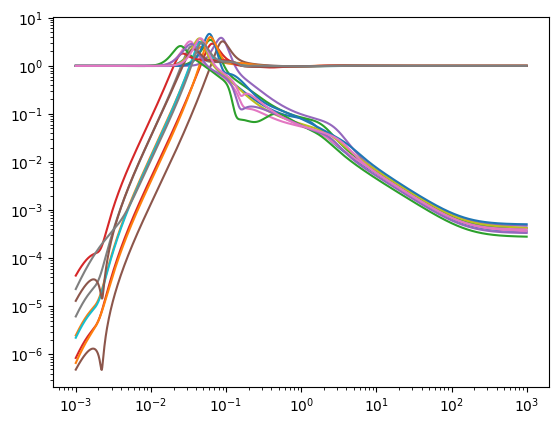

In [16]:
plt.loglog(f, abs(h1_prefilt_low_low(1j*2*np.pi*f)))
plt.loglog(f, abs(h2_prefilt_low_low(1j*2*np.pi*f)))

plt.loglog(f, abs(h1_prefilt_low_mid(1j*2*np.pi*f)))
plt.loglog(f, abs(h2_prefilt_low_mid(1j*2*np.pi*f)))

plt.loglog(f, abs(h1_prefilt_low_high(1j*2*np.pi*f)))
plt.loglog(f, abs(h2_prefilt_low_high(1j*2*np.pi*f)))

plt.loglog(f, abs(h1_prefilt_mid_low(1j*2*np.pi*f)))
plt.loglog(f, abs(h2_prefilt_mid_low(1j*2*np.pi*f)))

plt.loglog(f, abs(h1_prefilt_mid_mid(1j*2*np.pi*f)))
plt.loglog(f, abs(h2_prefilt_mid_mid(1j*2*np.pi*f)))

plt.loglog(f, abs(h1_prefilt_mid_high(1j*2*np.pi*f)))
plt.loglog(f, abs(h2_prefilt_mid_high(1j*2*np.pi*f)))

plt.loglog(f, abs(h1_prefilt_high_low(1j*2*np.pi*f)))
plt.loglog(f, abs(h2_prefilt_high_low(1j*2*np.pi*f)))

plt.loglog(f, abs(h1_prefilt_high_mid(1j*2*np.pi*f)))
plt.loglog(f, abs(h2_prefilt_high_mid(1j*2*np.pi*f)))

plt.loglog(f, abs(h1_prefilt_high_high(1j*2*np.pi*f)))
plt.loglog(f, abs(h2_prefilt_high_high(1j*2*np.pi*f)))

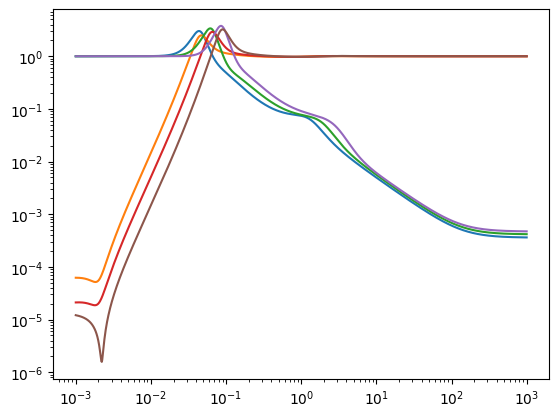

In [17]:
plt.loglog(f, abs(h1_low_low(1j*2*np.pi*f)))
plt.loglog(f, abs(h2_low_low(1j*2*np.pi*f)))

plt.loglog(f, abs(h1_low_mid(1j*2*np.pi*f)))
plt.loglog(f, abs(h2_low_mid(1j*2*np.pi*f)))

plt.loglog(f, abs(h1_low_high(1j*2*np.pi*f)))
plt.loglog(f, abs(h2_low_high(1j*2*np.pi*f)))

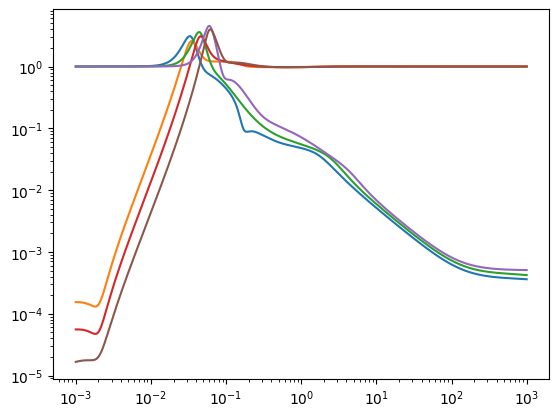

In [21]:
plt.loglog(f, abs(h1_mid_low(1j*2*np.pi*f)))
plt.loglog(f, abs(h2_mid_low(1j*2*np.pi*f)))

plt.loglog(f, abs(h1_mid_mid(1j*2*np.pi*f)))
plt.loglog(f, abs(h2_mid_mid(1j*2*np.pi*f)))

plt.loglog(f, abs(h1_mid_high(1j*2*np.pi*f)))
plt.loglog(f, abs(h2_mid_high(1j*2*np.pi*f)))

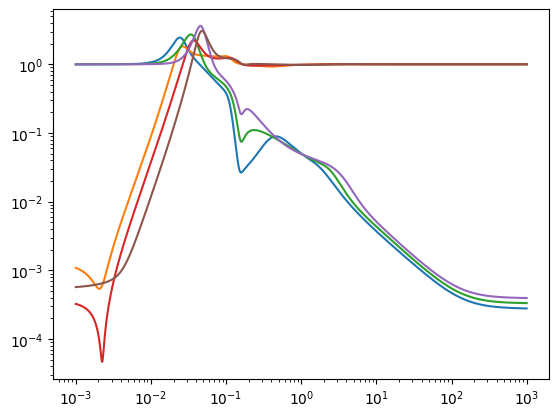

In [19]:
plt.loglog(f, abs(h1_high_low(1j*2*np.pi*f)))
plt.loglog(f, abs(h2_high_low(1j*2*np.pi*f)))

plt.loglog(f, abs(h1_high_mid(1j*2*np.pi*f)))
plt.loglog(f, abs(h2_high_mid(1j*2*np.pi*f)))

plt.loglog(f, abs(h1_high_high(1j*2*np.pi*f)))
plt.loglog(f, abs(h2_high_high(1j*2*np.pi*f)))

In [24]:
h1_low_low.save("complementary_filters/h1_low_low.pkl")
h1_low_mid.save("complementary_filters/h1_low_mid.pkl")
h1_low_high.save("complementary_filters/h1_low_high.pkl")

h1_mid_low.save("complementary_filters/h1_mid_low.pkl")
h1_mid_mid.save("complementary_filters/h1_mid_mid.pkl")
h1_mid_high.save("complementary_filters/h1_mid_high.pkl")

h1_high_low.save("complementary_filters/h1_high_low.pkl")
h1_high_mid.save("complementary_filters/h1_high_mid.pkl")
h1_high_high.save("complementary_filters/h1_high_high.pkl")

In [25]:
h2_low_low.save("complementary_filters/h2_low_low.pkl")
h2_low_mid.save("complementary_filters/h2_low_mid.pkl")
h2_low_high.save("complementary_filters/h2_low_high.pkl")

h2_mid_low.save("complementary_filters/h2_mid_low.pkl")
h2_mid_mid.save("complementary_filters/h2_mid_mid.pkl")
h2_mid_high.save("complementary_filters/h2_mid_high.pkl")

h2_high_low.save("complementary_filters/h2_high_low.pkl")
h2_high_mid.save("complementary_filters/h2_high_mid.pkl")
h2_high_high.save("complementary_filters/h2_high_high.pkl")

In [27]:
prefilter = kontrol.TransferFunction(prefilter)
prefilter.save("complementary_filters/prefilter.pkl")